In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict
from datashader.bundling import hammer_bundle
import numpy as np
import statistics as st
import community
import time
import matplotlib.colors as mcolors

/Applications/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [30]:
def create_pos_dic(network, data):
    df = pd.DataFrame(columns = ['Latitude', 'Longitude'])
    counter = 0
    for company_abi in network.ABI:
        counter += 1
        df = df.append(data[data['ABI']==company_abi][['Latitude', 'Longitude']])
        print('We are at company: ', counter)
    keys = network.nodes
    pos_list = [[df['Longitude'][ind],df['Latitude'][ind]]for ind in df.index]
    values = pos_list
    pos_dic = dict(zip(keys,values))
    return pos_dic

In [34]:
#import positional dictionary which contains the geogrphic postions of the companies headquaters
try:
    import cPickle as pickle
except ImportError:  
    import pickle
with open('pos_dic.p', 'rb') as fp:
    pos_dic = pickle.load(fp)

In [3]:
weighted_directed_hyplinks_graph = nx.read_gml("weighted_directed_hyplinks_graph")
weighted_directed_followers_graph = nx.read_gml("weighted_directed_followers_graph")

In [4]:
#check whether both networks actually contain the same nodes
n1 = list(weighted_directed_followers_graph.nodes())
n2 = list(weighted_directed_hyplinks_graph.nodes())
n1 == n2
set(n1)==set(n2)

True

In [5]:
print(nx.info(weighted_directed_followers_graph))
print(nx.info(weighted_directed_hyplinks_graph))

Name: 
Type: DiGraph
Number of nodes: 11890
Number of edges: 117396
Average in degree:   9.8735
Average out degree:   9.8735
Name: 
Type: DiGraph
Number of nodes: 11890
Number of edges: 5670
Average in degree:   0.4769
Average out degree:   0.4769


# Maximal number of edges

In [5]:
deg1_in = weighted_directed_followers_graph.in_degree()
deg1_out = weighted_directed_followers_graph.out_degree()
deg2_in = weighted_directed_hyplinks_graph.in_degree()
deg2_out = weighted_directed_hyplinks_graph.out_degree()

In [7]:
deg1_in_d = {key: value for (key, value) in deg1_in}
deg1_out_d = {key: value for (key, value) in deg1_out}
deg2_in_d = {key: value for (key, value) in deg2_in}
deg2_out_d = {key: value for (key, value) in deg2_out}
def get_key(val, dic):
    for key, value in dic.items():
        if val == value:
            print(key)
            print(val)
            
            return key
    return 'not found'

In [8]:
get_key(max(deg1_in_d.values()),deg1_in_d )
get_key(max(deg1_out_d.values()),deg1_out_d )
print()
get_key(max(deg2_in_d.values()),deg2_in_d )
get_key(max(deg2_out_d.values()),deg2_out_d )




@CNN
1381
@Pardot
370

@bbb_us
429
@igxglobal
52


'@igxglobal'

In [9]:
degree_foll = nx.degree(weighted_directed_followers_graph)
max(list(dict(degree_foll).values()))

1382

In [10]:
degree_hyp = nx.degree(weighted_directed_hyplinks_graph)
max(list(dict(degree_hyp).values()))

429

# Densitiy 
https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

In [23]:
from scipy import stats

In [33]:
start = time.time()
density_foll = nx.density(weighted_directed_followers_graph) 
end = time.time()

In [34]:
start = time.time()
density_hyp = nx.density(weighted_directed_hyplinks_graph) 
end = time.time()

In [35]:
density_foll

0.0008304741482769444

In [36]:
(density_hyp)

4.011029694989842e-05

In [42]:
0.09522137/0.00325684

29.237349700937106

# Triads
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.triads.triadic_census.html

http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf


In [3]:
start = time.time()
triads_foll = nx.triadic_census(weighted_directed_followers_graph) 
end = time.time()

In [4]:
start = time.time()
triads_hyp = nx.triadic_census(weighted_directed_hyplinks_graph) 
end = time.time()

In [5]:
triads_foll

{'003': 279184253490,
 '012': 934792450,
 '102': 230503336,
 '021D': 888748,
 '021U': 10145112,
 '021C': 1058063,
 '111D': 1344968,
 '111U': 809691,
 '030T': 107106,
 '030C': 1260,
 '201': 481068,
 '120D': 30497,
 '120U': 30096,
 '120C': 10971,
 '210': 23615,
 '300': 7373}

In [6]:
triads_hyp

{'003': 280298355510,
 '012': 64825886,
 '102': 1045892,
 '021D': 9939,
 '021U': 247644,
 '021C': 2281,
 '111D': 328,
 '111U': 209,
 '030T': 109,
 '030C': 0,
 '201': 9,
 '120D': 11,
 '120U': 18,
 '120C': 0,
 '210': 4,
 '300': 4}

# Transitivity
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html#networkx.algorithms.cluster.transitivity

How to interpret that? 

Does this also account for directed graphs?

In [8]:
start = time.time()
transitivity_foll = nx.transitivity(weighted_directed_followers_graph) 
end = time.time()

In [7]:
start = time.time()
transitivity_hyp = nx.transitivity(weighted_directed_hyplinks_graph) 
end = time.time()

In [9]:
transitivity_hyp

0.009822897512822995

In [10]:
transitivity_foll

0.07209123290725751

# Isolates

In [22]:
start = time.time()
iso_foll = list(nx.isolates(weighted_directed_followers_graph)) 
end = time.time()

In [23]:
start = time.time()
iso_hyp = list(nx.isolates(weighted_directed_hyplinks_graph)) 
end = time.time()

In [24]:
len((iso_foll))


2006

In [25]:
len(iso_hyp)

7908

# Clustering
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

https://networkx.org/documentation/latest/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html

In [39]:
start = time.time()
clustering_foll = nx.clustering(weighted_directed_followers_graph) 
clustering_foll_avg = nx.average_clustering(weighted_directed_followers_graph) 
end = time.time()
print(end-start)

7.2928688526153564


In [38]:
start = time.time()
clustering_hyp = nx.clustering(weighted_directed_hyplinks_graph)
clustering_hyp_avg = nx.average_clustering(weighted_directed_hyplinks_graph)
end = time.time()
print(end-start)

0.23308992385864258


In [17]:
clustering_foll

0.09522136544956522

In [41]:
stats.ttest_rel(list(clustering_foll.values()),list(clustering_hyp.values()))

Ttest_relResult(statistic=66.85114742539238, pvalue=0.0)

In [8]:
clustering_hyp_ordered = []
for n in clustering_foll.keys():
    clustering_hyp_ordered.append(clustering_hyp[n])

In [9]:
clustering_df = pd.DataFrame(list(zip(list(clustering_foll.keys()), (clustering_hyp_ordered),list(clustering_foll.values()))),columns=['nodes', 'clustering_h', 'clustering_f'])

In [ ]:
import pandas as pd 
clustering_df =pd.read_csv('')

In [37]:
clustering_foll

0.09522136544956522

# Plotting the clustering distributions

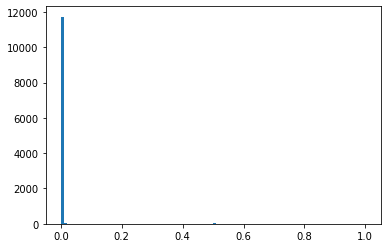

In [108]:
plt.hist(clustering_hyp.values(), bins=100)
plt.show()

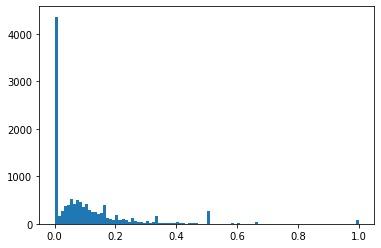

In [107]:
plt.hist(clustering_foll.values(), bins=100)
plt.show()

# Plot networks on map

In [ ]:
import mplleaflet

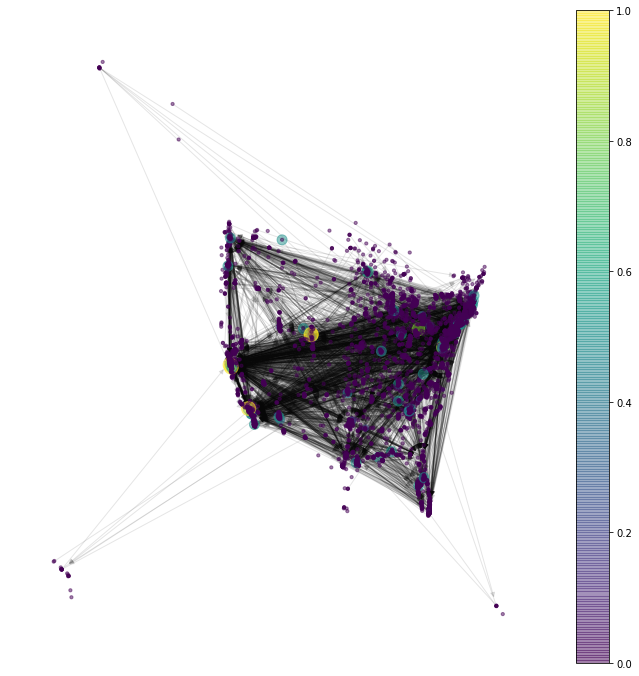

In [66]:
start = time.time()
colors = dict(clustering_hyp)
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G, pos_dic,  alpha=0.1)
nc = nx.draw_networkx_nodes(
    G,
    pos_dic,
    nodelist=list(p.keys()),
    node_size = node_sizes,
    node_color=list(colors.values()),
    alpha =0.5
)
plt.colorbar(nc)
plt.axis("off")
plt.show()
end = time.time()
